Testing for HW1
* give sample data set with 3 weak classifiers
* choose which one to use
* choose decision threshold based on ROC
* classify new points with this threshold  (can only do this if all clfs have predict_proba)
  * linear
  * NN
  * tree
  * Naive Bayes
  * KNN
  * dummy (!)
* NOTE THAT SVC uses decision_function and others use predict_proba

Code from:
* http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X, y = datasets.make_classification(n_samples=100, n_features=8, n_informative=3, 
                                      n_classes=2, class_sep=0.7, random_state=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:

from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import neural_network

lin = SVC(kernel='linear', C=1,probability=True)
dum = DummyClassifier(strategy='most_frequent',random_state=0)
dtr = tree.DecisionTreeClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
gnb = naive_bayes.GaussianNB() 
ann = neural_network.MLPClassifier(random_state=1)


C:\Users\msd97m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


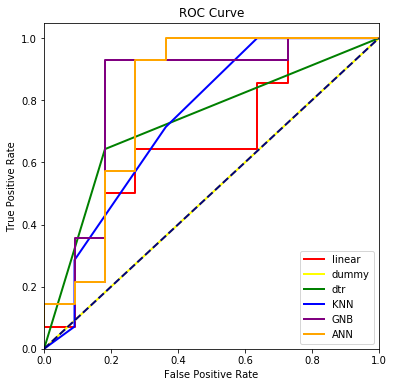

In [26]:
plt.figure(figsize=(6,6))
lw = 2

#clf = (lin, dum, dtr, knn)
clf = (lin,dum,dtr,knn,gnb,ann)
col = ('red','yellow','green','blue','purple','orange')
names = ('linear','dummy','dtr','KNN','GNB','ANN')

for i,c,n in zip(clf,col,names):
    i.fit(X_train,y_train)
    y = y_test
    y_score = i.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y,y_score)
    plt.plot(fpr, tpr, color=c, label=n, lw=lw)
    
#y_score = dum.predict(X_test)
#fpr, tpr, thresh = metrics.roc_curve(y,y_score)
#plt.plot(fpr, tpr, color='darkorange', label='dum', lw=lw)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# annotate thresholds at every other point


plt.show()

In [ ]:
y_score = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresh = metrics.roc_curve(y,y_score)

In [ ]:
np.c_[thresh, fpr, tpr]

In [ ]:
fpr, tpr, thresh = metrics.roc_curve(y,y_score)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresh

In [ ]:
y.shape

In [ ]:
np.c_[y, y_score]

In [ ]:
a = DummyClassifier(strategy='most_frequent',random_state=0)
a.fit(X_train, y_train)
a.score(X_test, y_test)  

In [ ]:
b= SVC(kernel='linear', C=1).fit(X_train, y_train)
b.score(X_test, y_test) 

In [ ]:
c = tree.DecisionTreeClassifier()
c.fit(X_train, y_train)
c.score(X_test, y_test)

In [ ]:
k = neighbors.KNeighborsClassifier(n_neighbors=9)
k.fit(X_train, y_train)
k.score(X_test,y_test)

In [ ]:
# knn does NOT have decision_function, but we get predict_proba
y_score = k.predict_proba(X_test)[:,1]
y_score

In [ ]:
fpr, tpr, thresh = metrics.roc_curve(y_test,y_score)

In [ ]:
roc_auc = metrics.auc(fpr,tpr)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()